# Adaptive Smooth

dmimgadapt

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 13201
download_chandra_obsid 13201 --exclude vvref,osol,eph1,evt2


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits      109 Mb  ####################            2 s  66977.7 kb/s
  asol     fits       11 Mb  ####################          < 1 s  57715.9 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  35917.0 kb/s
  stat     fits        1 Mb  ####################          < 1 s  36054.6 kb/s
  aqual    fits      759 Kb  ####################          < 1 s  32653.9 kb/s
  cntr_img jpg       599 Kb  ####################          < 1 s  25970.7 kb/s
  bias     fits      435 Kb  ####################          < 1 s  25757.2 kb/s
  bias     fits      433 Kb  ####################          < 1 s  25480.3 kb/s
  bias     fits      432 Kb  ####################          < 1 s  18149.9 kb/s
  bias     fits      430 Kb  ####################          < 1 s  24807.0 kb/s
  bias     fits      424 Kb  ####################    

In [3]:
chandra_repro 13201 out=./


Running chandra_repro
version: 04 March 2021


Processing input directory '/proj/sds/Staff/kjg/Threads/adaptive_smooth/13201'

No boresight correction update to asol file is needed.
Resetting afterglow status bits in evt1.fits file...

Running acis_build_badpix and acis_find_afterglow to create a new bad pixel file...

Running acis_process_events to reprocess the evt1.fits file...
Filtering the evt1.fits file by grade and status and time...
Applying the good time intervals from the flt1.fits file...
The new evt2.fits file is: /proj/sds/Staff/kjg/Threads/adaptive_smooth/acisf13201_repro_evt2.fits

Updating the event file header with chandra_repro HISTORY record
Creating FOV file...
Setting observation-specific bad pixel file in local ardlib.par.

Cleaning up intermediate files

         /proj/sds/Staff/kjg/Threads/adaptive_smooth/acisf13201_repro_bpix1.fits
         Run 'punlearn ardlib' when analysis of this dataset completed.

The data have been reprocessed.
Start your analysis with 

In [4]:
fluximage infile='acisf13201_repro_evt2.fits[ccd_id=0:3]' \
  outroot='abell_665' bands='broad' binsize='2' \
  mode=h clob+ verb=1

Running fluximage
Version: 23 February 2021

Using CSC ACIS broad science energy band.
Aspect solution pcadf13201_000N001_asol1.fits found.
Bad-pixel file acisf13201_repro_bpix1.fits found.
Mask file acisf13201_000N003_msk1.fits found.

The output images will have 1405 by 1408 pixels, pixel size of 0.984 arcsec,
    and cover x=2656.5:5466.5:2,y=2850.5:5666.5:2.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 13201
Creating 4 instrument maps for obsid 13201
Creating 4 exposure maps for obsid 13201
Combining 4 exposure maps for obsid 13201
Thresholding data for obsid 13201
Exposure-correcting image for obsid 13201

The following files were created:

 The clipped counts image is:
     abell_665_broad_thresh.img

 The clipped exposure map is:
     abell_665_broad_thresh.expmap

 The exposure-corrected image is:
     abell_665_broad_flux.img



## Shrink fov to just include ccds

In [5]:
dmcopy "acisf13201_repro_fov1.fits[ccd_id=0:3]" fov.fits cl+


In [6]:
dmcopy "abell_665_broad_thresh.img[sky=region(fov.fits)][opt full]" broad.img cl+
dmcopy "abell_665_broad_thresh.expmap[sky=region(fov.fits)][opt full]" broad.expmap cl+

In [7]:
dmlist broad.img subspace

 
--------------------------------------------------------------------------------
Data subspace for block EVENTS_IMAGE: Components: 4 Descriptors: 17 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 sky                  Real8               Polygon(3587.01,5193.79,3587.29,5190.4,3587.29,5190.36,3587.33,5190.26,3587.36,5190.19,3587.4,5190.09,3590.61,5183.3,4049.55,4274.12,4060.42,4253.15,4060.96,4252.24,4060.98,4252.21,4061.02,4252.2,4061.08,4252.21,4061.71,4252.49,4065.86,4254.39,4974.35,4710.23,4995.99,4721.39,4998.47,4722.76,4998.51,4722.78,4998.78,4723.13,4998.8,4723.17,4998.84,4723.29,4998.69,4725.17,4998.06,4726.95,4998.04,4727,4996.68,4730.43,4996.61,4730.6,4996.48,4730.88,4526.29,5661.67,4525.83,5662.49,4524.51,5664.82,4524.05,5664.93,4523.81,5664.92,4518.51,5662.78,4517.37,5662.25,3608.95,5205.99,3599.59,5201.18,3587.6,5194.89,3587.5,5194.81,3587.21,5194.52,3587.1,5194.38,3587.05,5194.31,3587.04,5194.28,3587.02,5194.

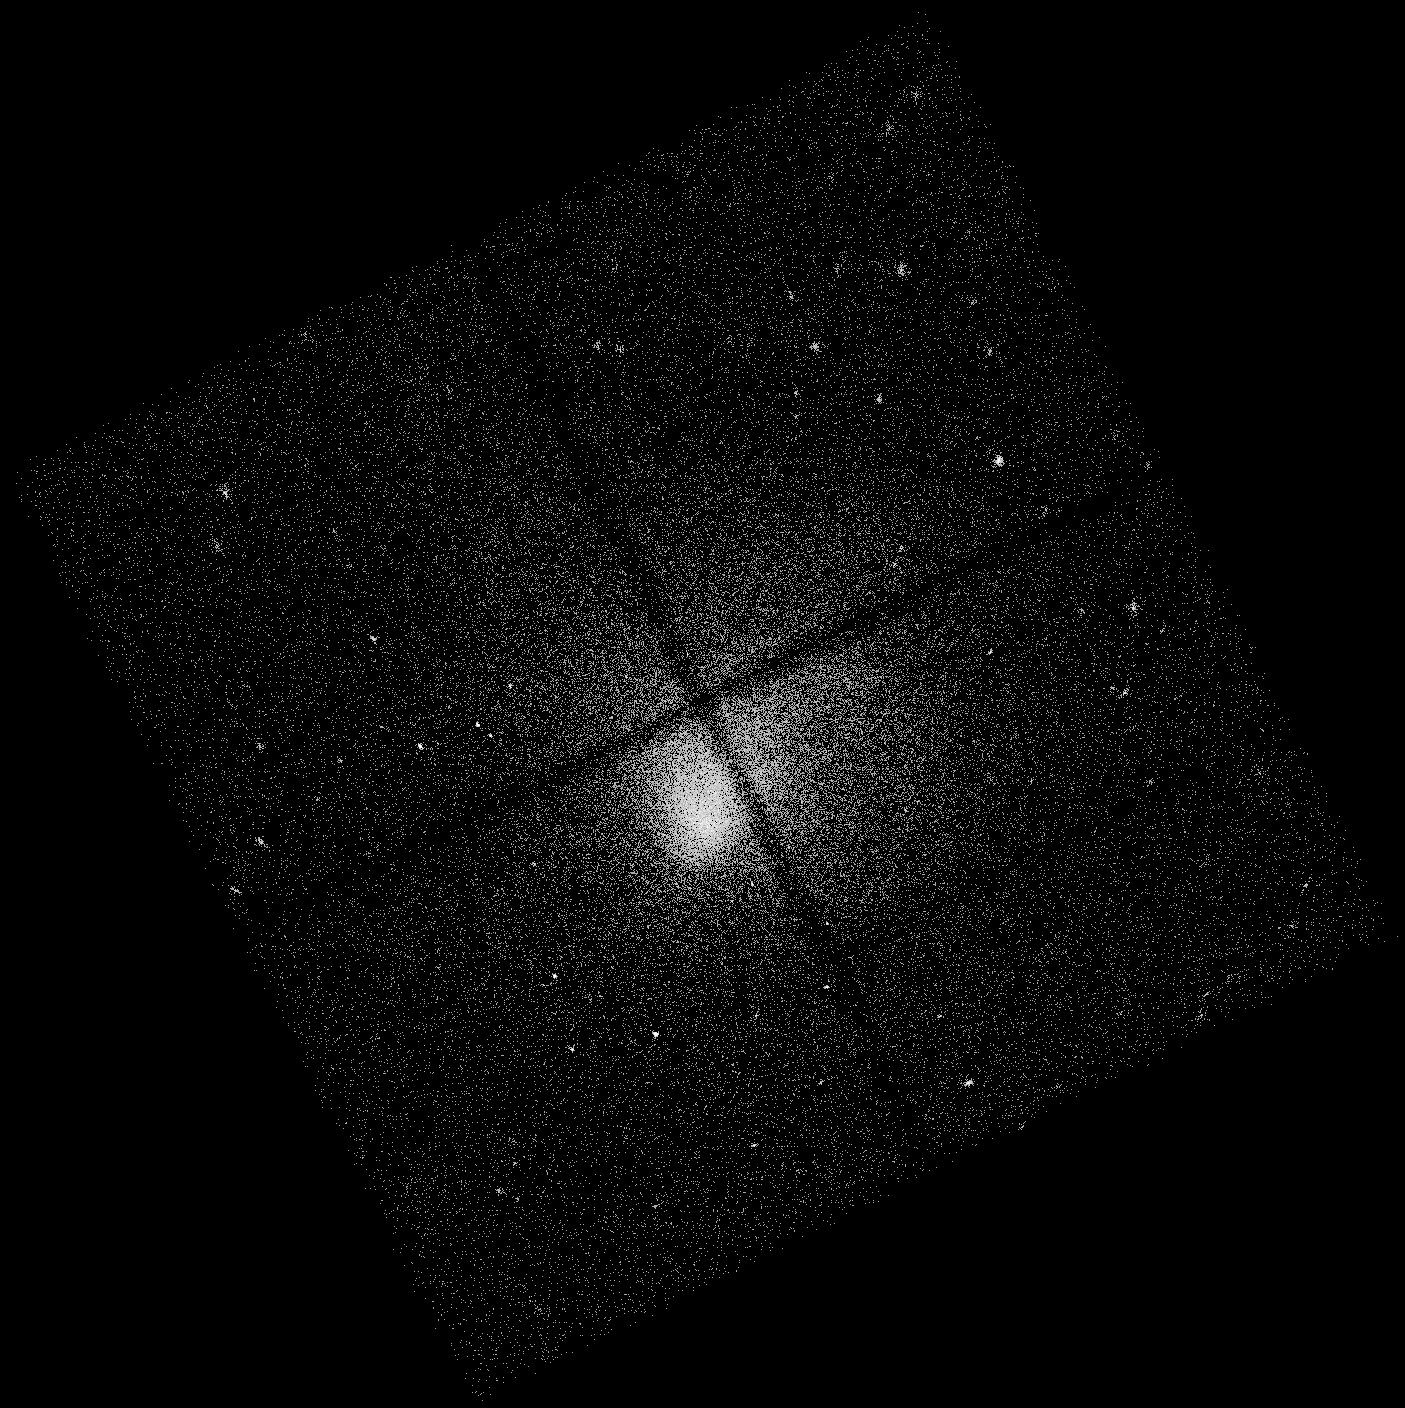

In [8]:
dmimg2jpg broad.img outfile=broad_img.jpg maxred=10 mode=h clob+
display < broad_img.jpg


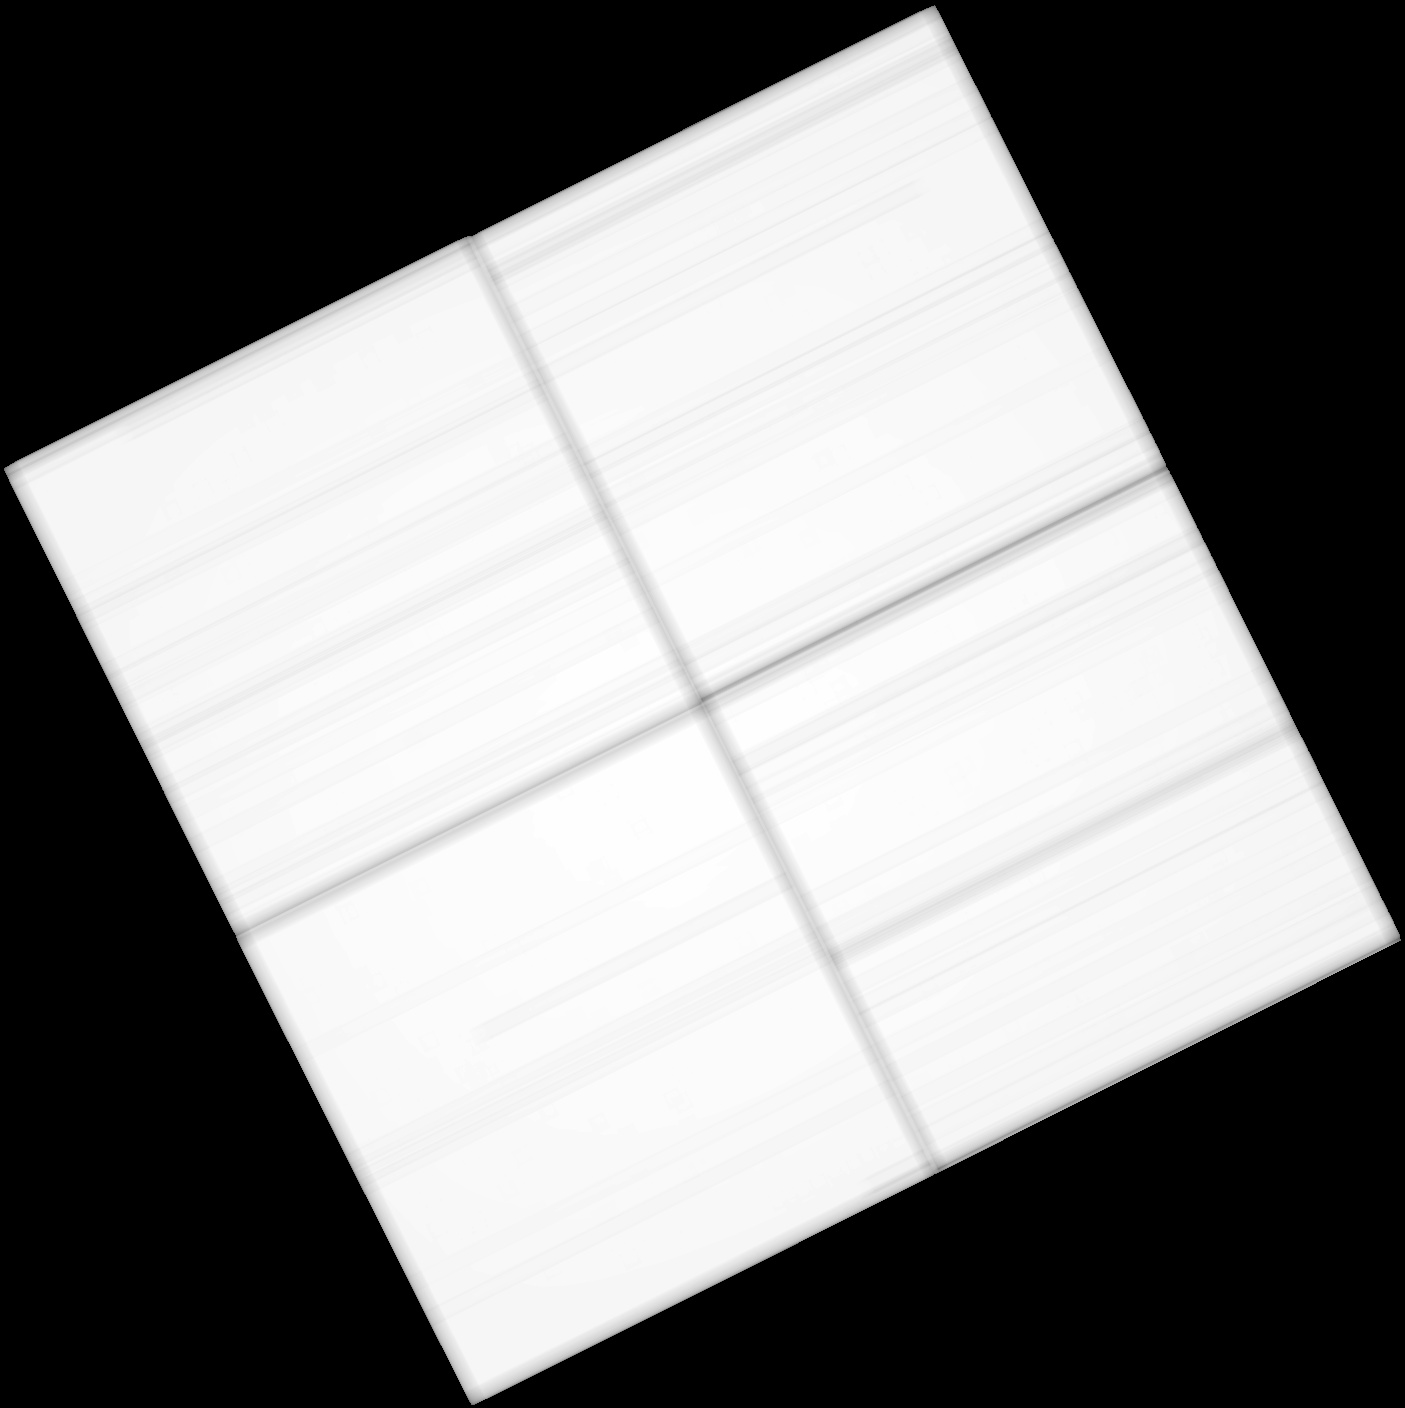

In [9]:
dmimg2jpg broad.expmap outfile=broad_expmap.jpg mode=h clob+ minred=0
display < broad_expmap.jpg

##  Adaptive smooth: counts


In [10]:
punlearn dmimgadapt
pset dmimgadapt \
  infile=broad.img \
  outfile=broad_smooth.img \
  counts=25 \
  radfile=broad.radii \
  normfile=broad.norm \
  function=quad \
  minrad=0.5 \
  maxrad=30 \
  numrad=50 \
  radscale=log
dmimgadapt mode=h clobber=yes

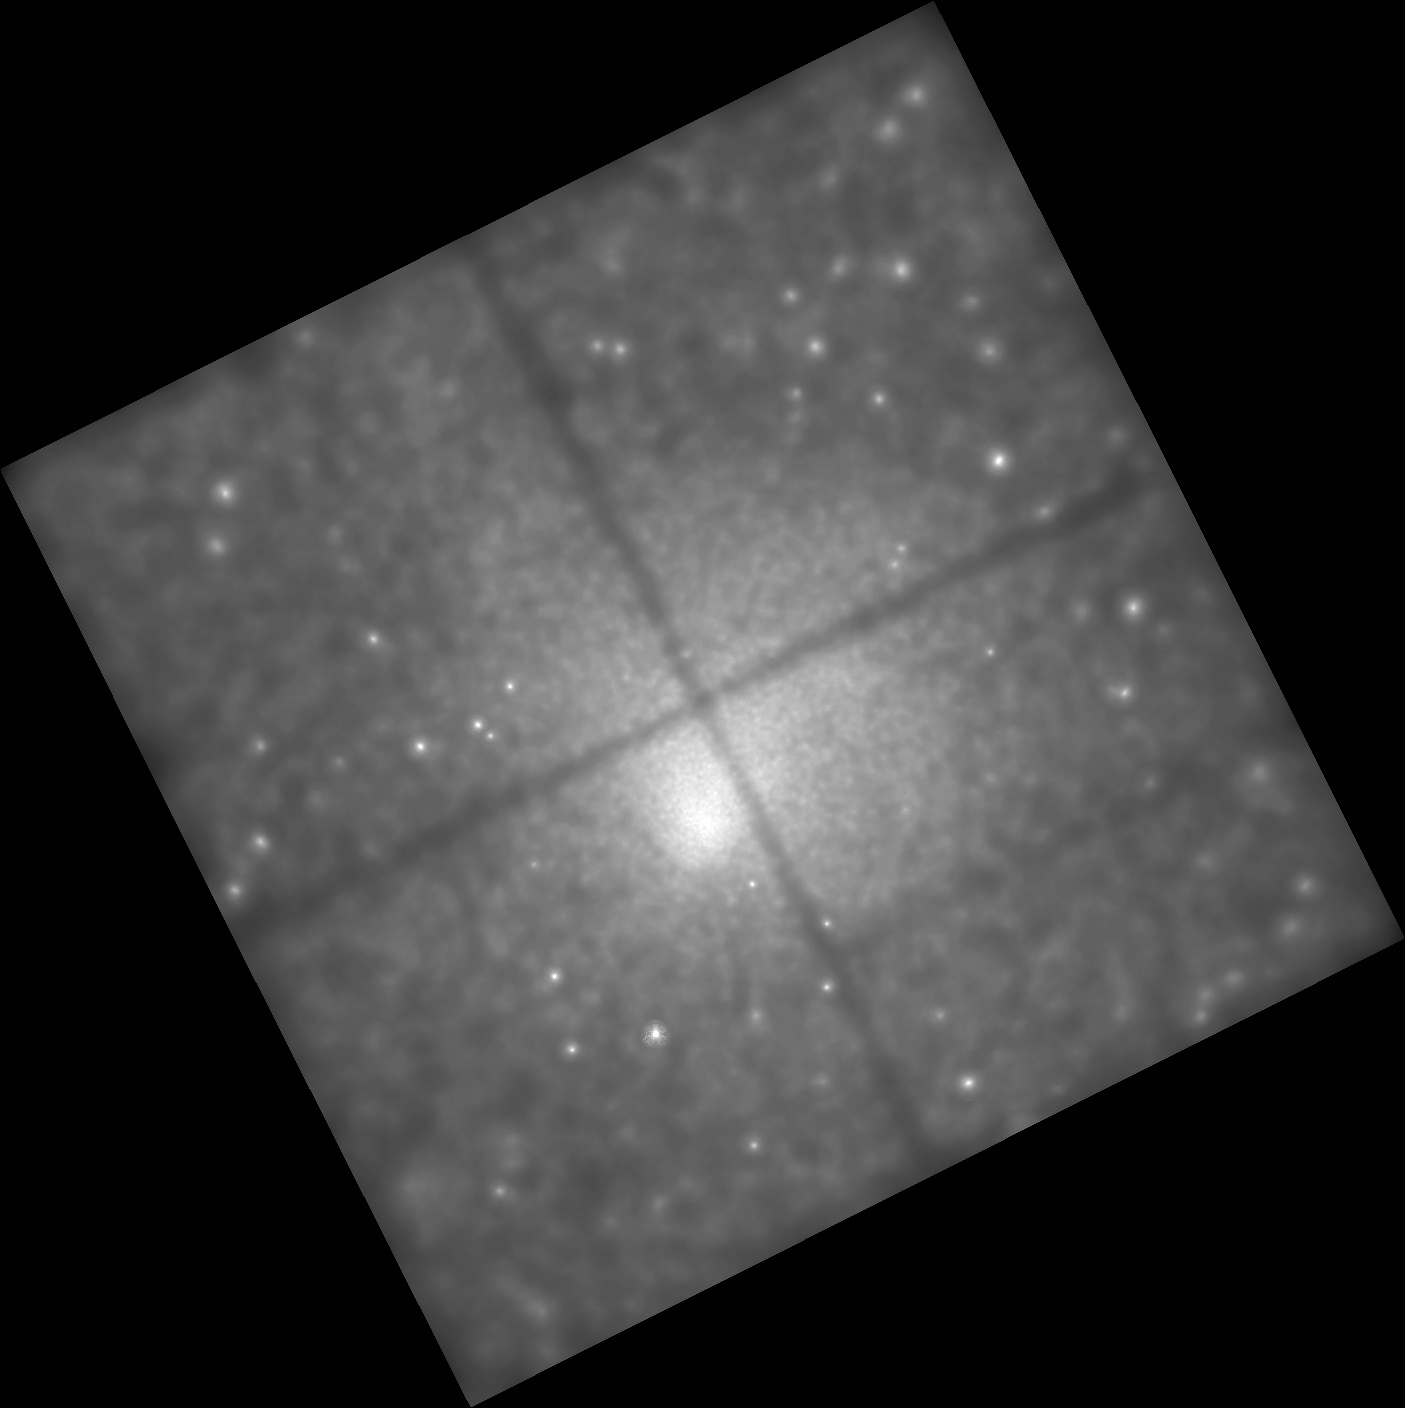

In [11]:
punlearn dmimg2jpg
dmimg2jpg broad_smooth.img outfile=broad_smooth.jpg scalefun=log \
  maxred=4 minred=0.0 mode=h clob+
display < broad_smooth.jpg

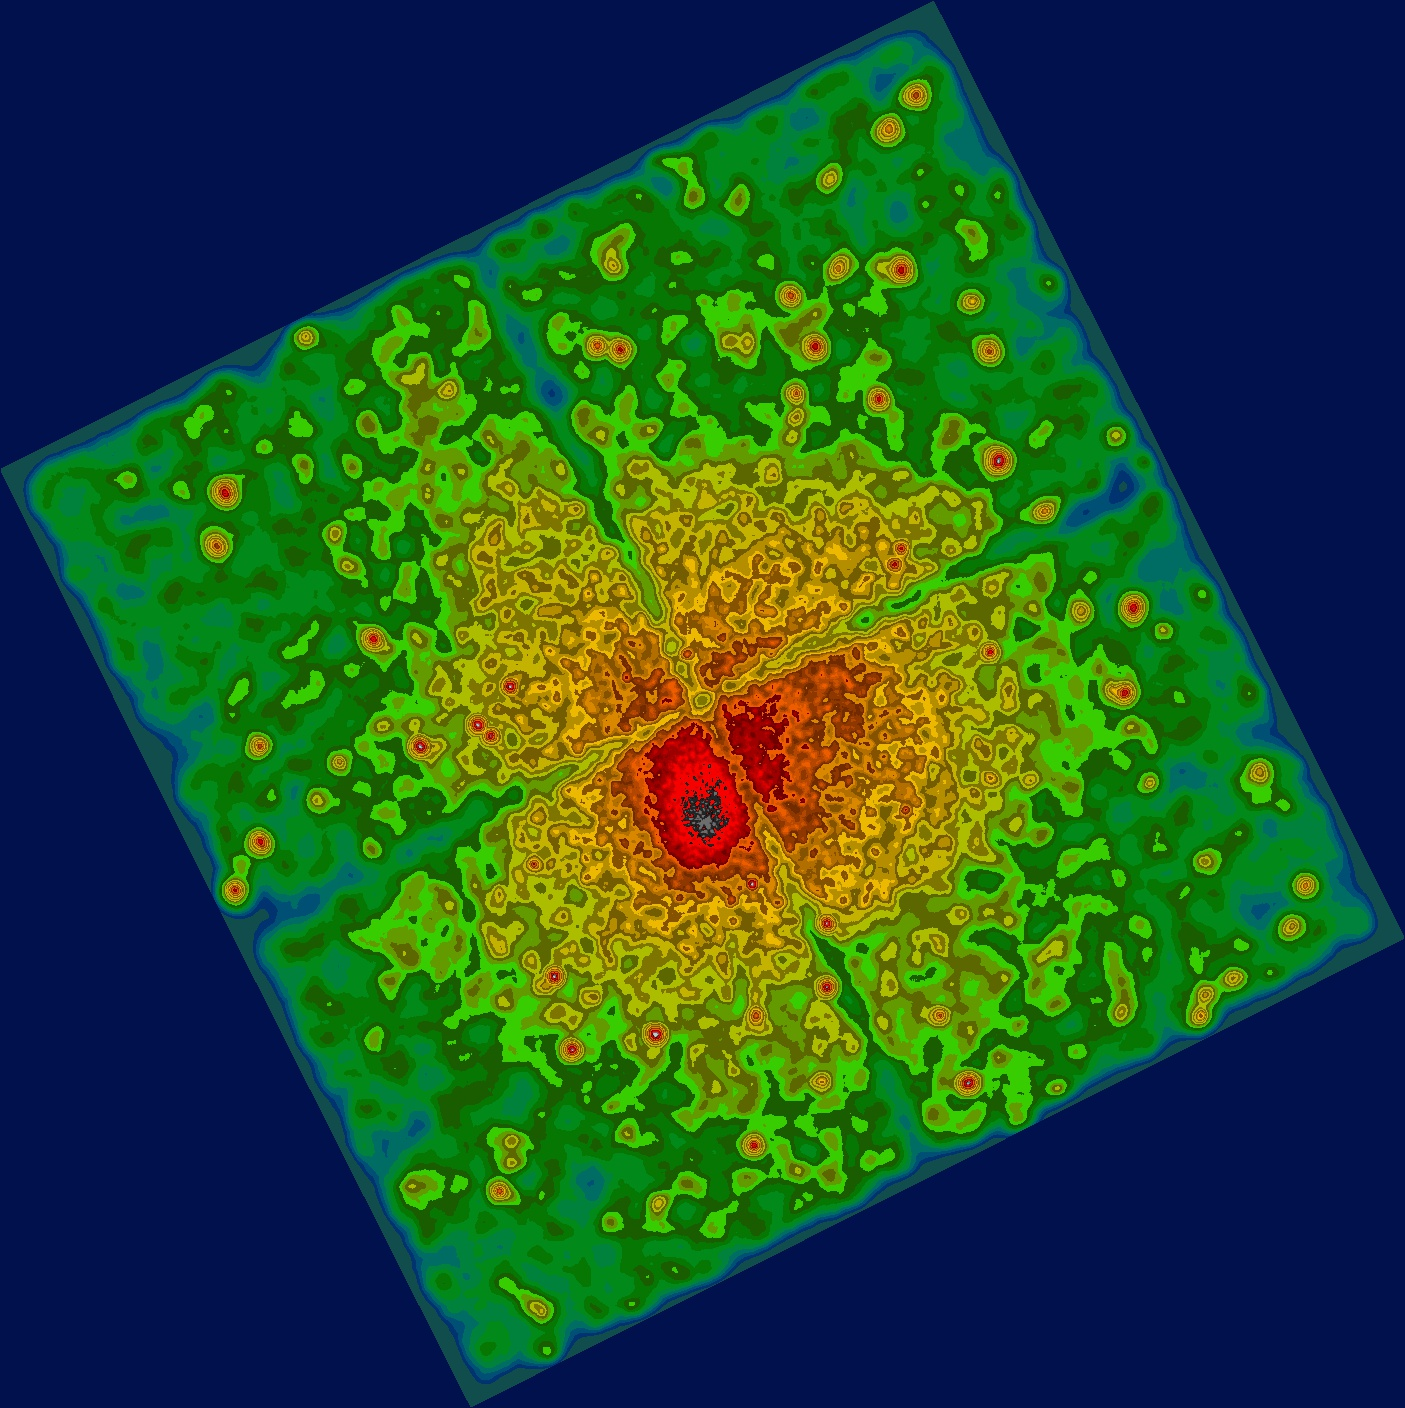

In [12]:
dmimg2jpg broad.radii outfile=broad_radii.jpg mode=h clob+ \
  scalefun=linear lutfile=")imagej_lut.16_ramps" minred=0 maxred=30
display < broad_radii.jpg


## Smooth expmap


In [13]:
dmimgcalc broad.expmap none ones.fits op="imgout=(1.0+(img1-img1))" clob+


In [14]:
punlearn dmimgadapt
pset dmimgadapt \
  infile=broad.expmap \
  outfile=broad_smooth.expmap \
  inradfile=broad.radii \
  innormfile=ones.fits \
  function=quad 
dmimgadapt mode=h clobber=yes 

# dmimgadapt (CIAO 4.13): The following error occurred 879409 times:



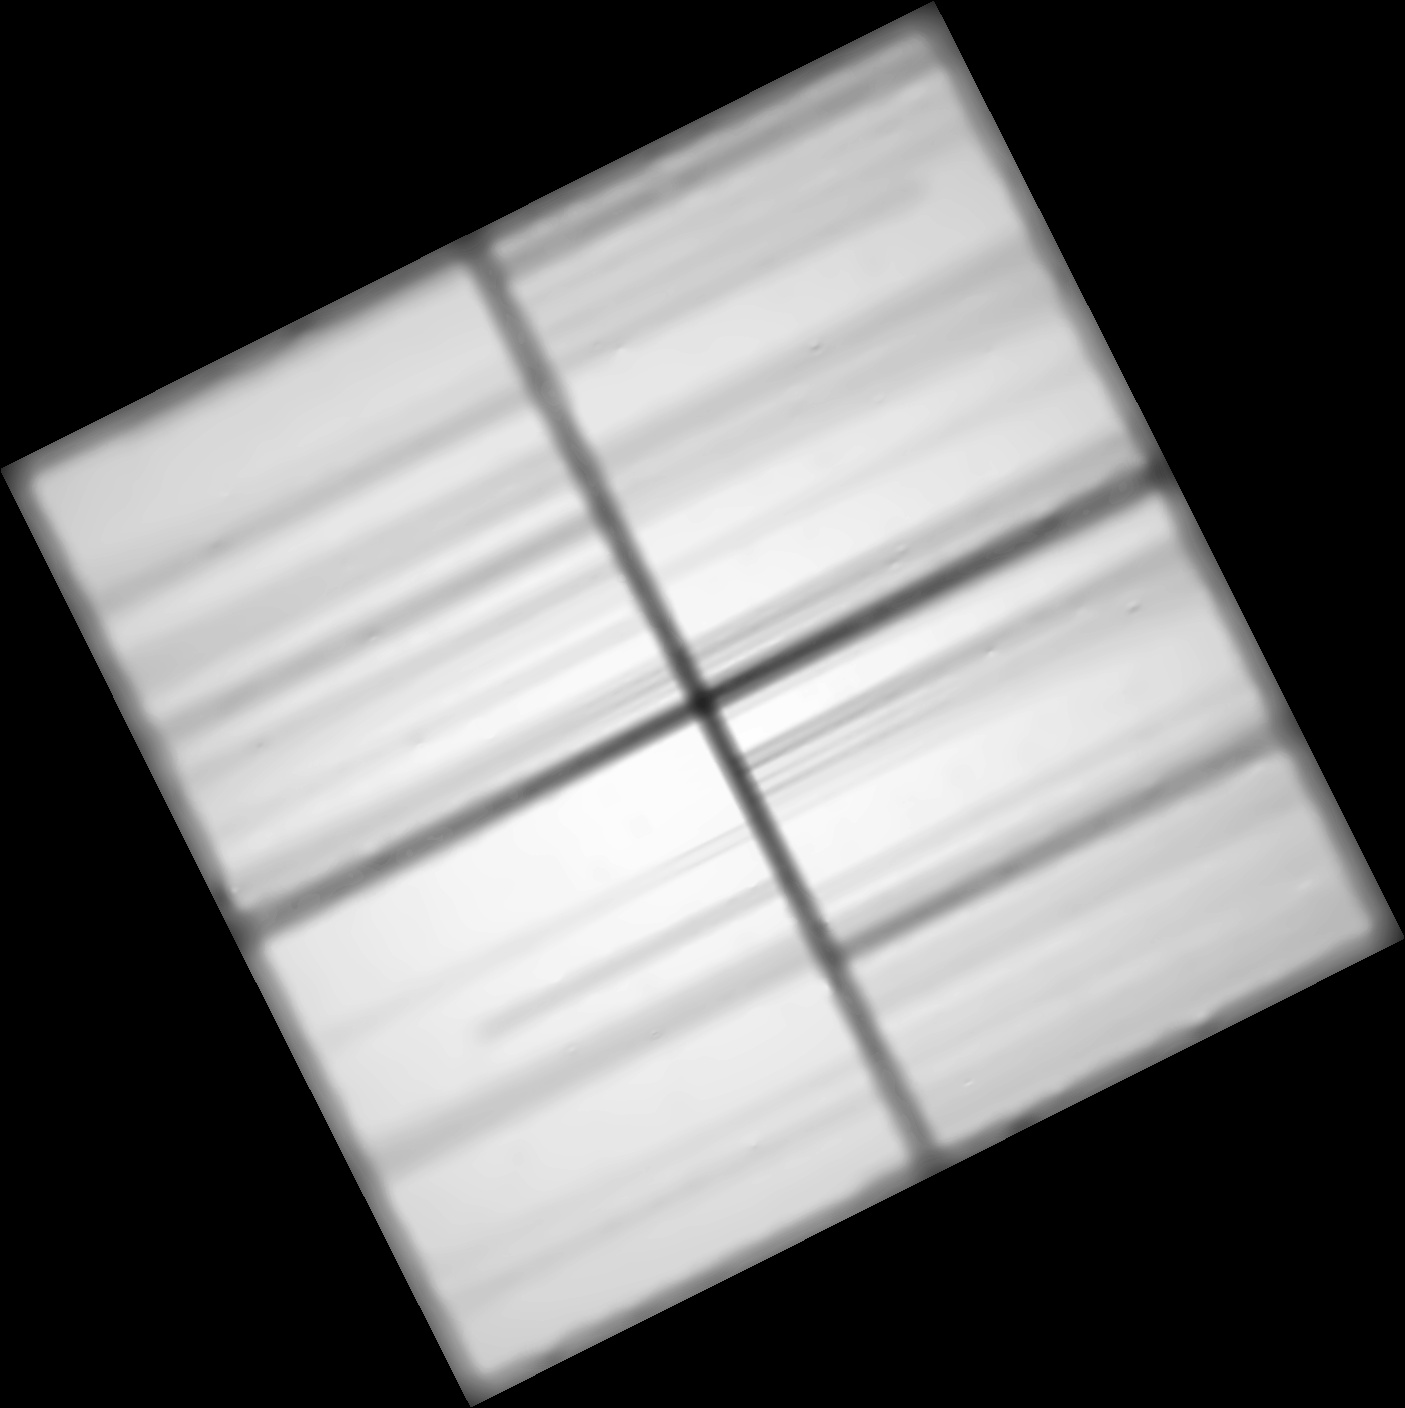

In [15]:
punlearn dmimg2jpg
dmimg2jpg broad_smooth.expmap outfile=broad_smooth_expmap.jpg scalefun=linear \
  mode=h clob+ minred=0 maxred=13085488
display < broad_smooth_expmap.jpg

## Exposure corrected


In [16]:
dmimgcalc broad_smooth.img broad_smooth.expmap broad_smooth.flux div clob+

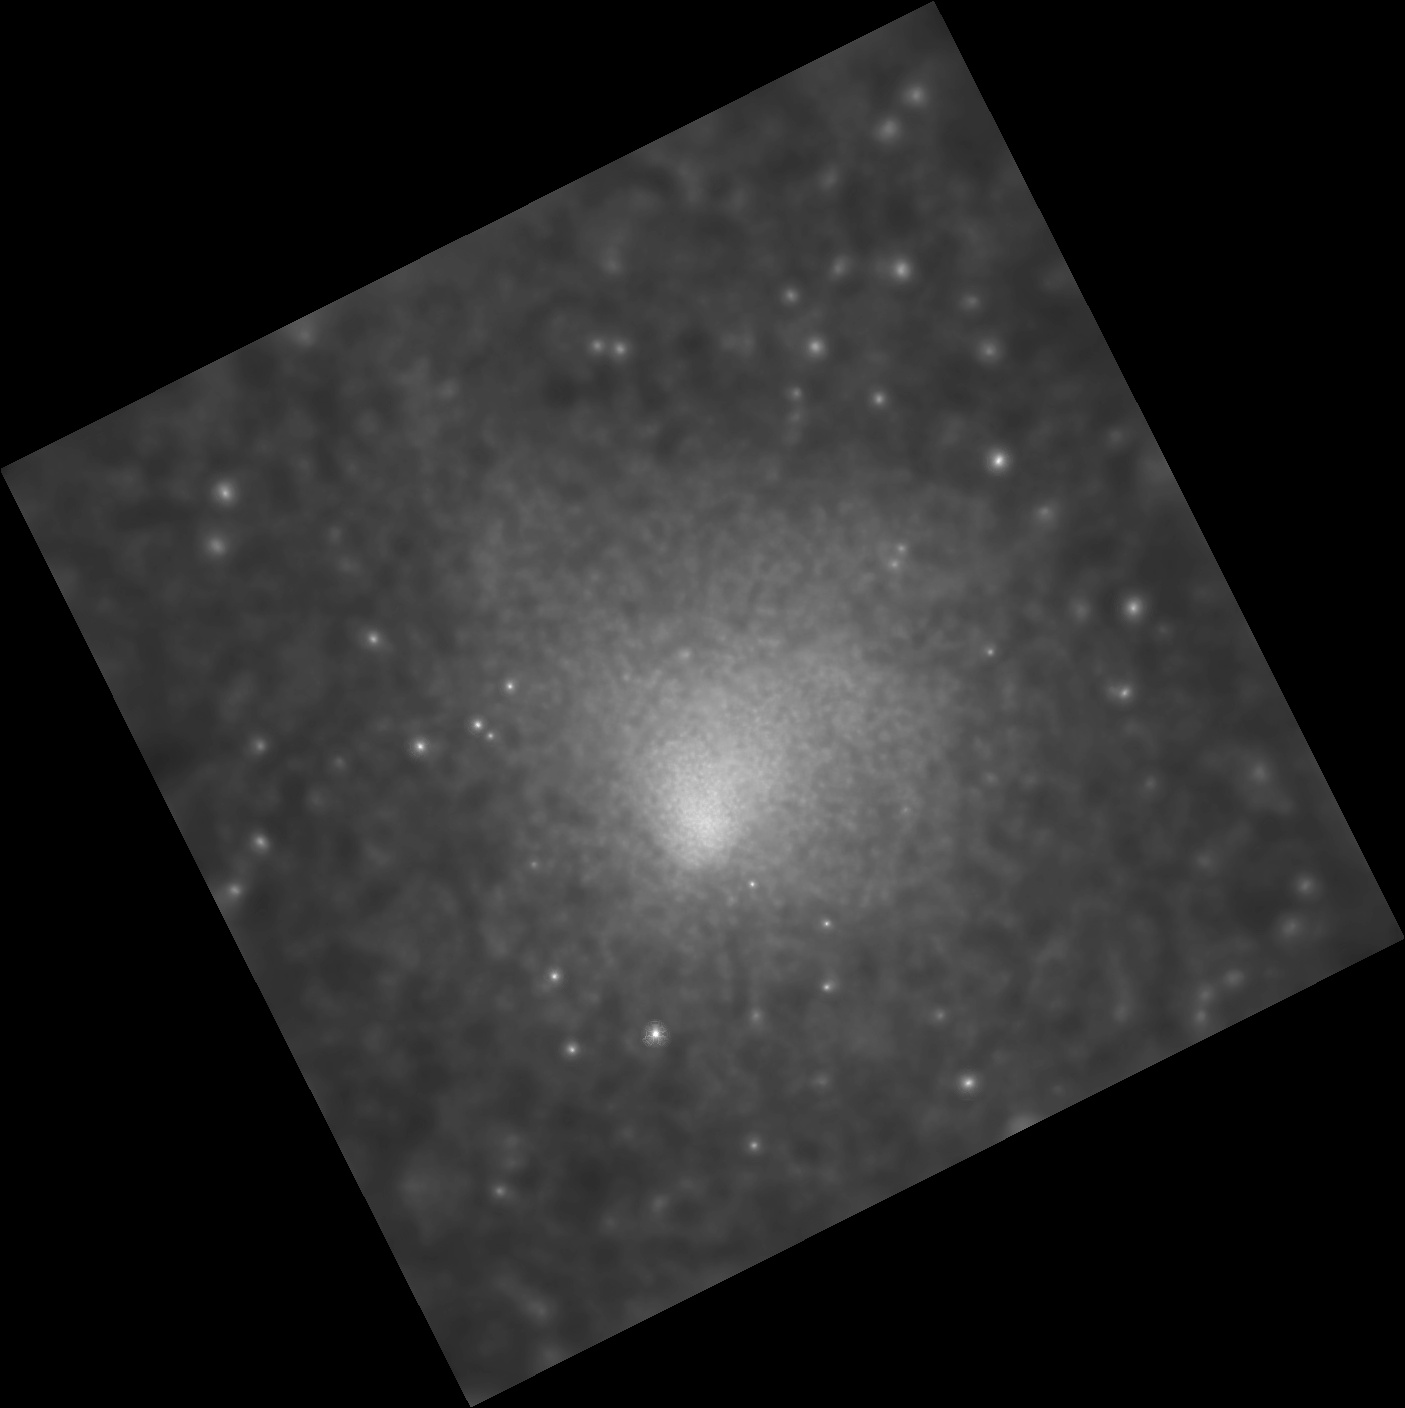

In [17]:
punlearn dmimg2jpg
dmimg2jpg broad_smooth.flux outfile=broad_smooth_flux.jpg scalefun=log \
  mode=h clob+ minred=0 maxred=1e-06
display < broad_smooth_flux.jpg

# Cleanup


In [18]:
/bin/rm -rf 13201
/bin/rm -f acisf*.fits acisf*.lis
/bin/rm -f pcadf*.fits
